In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from models import residualAttentionNeXt56, residualAttentionNeXt92
import pandas as pd
from utils import plot_training_hist

In [2]:
(x_train_10, y_train_10), (x_test_10, y_test_10) = cifar10.load_data()
y_train_10 = to_categorical(y_train_10, 10)
y_test_10 = to_categorical(y_test_10, 10)
x_train_10, x_vali_10, y_train_10, y_vali_10 = train_test_split(x_train_10, y_train_10, test_size=0.05, random_state=42)

## Residual Attention NeXt 56

In [4]:
model = residualAttentionNeXt56()

In [5]:
model.count_params()

20884554

In [6]:
save_model_name = "attentionNeXt56.h5"

lrSchedule = ReduceLROnPlateau(monitor="val_categorical_accuracy", factor=0.2, patience=10, verbose=1)
checkpoint = ModelCheckpoint(save_model_name,
                             monitor='val_loss', verbose = 0, save_best_only = True,
                             mode='auto', sav_freq = 'epoch')
model.compile(optimizer=Adam(learning_rate=1e-4),metrics="categorical_accuracy",loss="categorical_crossentropy")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    brightness_range=[0.7,1.3],
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
vali_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_hist = model.fit(
    train_datagen.flow(x_train_10, y_train_10, batch_size=64, shuffle=True),
    callbacks = [checkpoint,lrSchedule],
    validation_data = vali_datagen.flow(x_vali_10, y_vali_10, shuffle=False, batch_size=64),
    steps_per_epoch=len(x_train_10) / 64, epochs=100,
    verbose=1)

Epoch 1/100
743/742 [==============================] - 843s 1s/step - loss: 2.2313 - categorical_accuracy: 0.3981 - val_loss: 1.8030 - val_categorical_accuracy: 0.4312
Epoch 2/100
743/742 [==============================] - 778s 1s/step - loss: 1.6126 - categorical_accuracy: 0.4655 - val_loss: 1.5072 - val_categorical_accuracy: 0.4976
Epoch 3/100
743/742 [==============================] - 748s 1s/step - loss: 1.5408 - categorical_accuracy: 0.4903 - val_loss: 1.6126 - val_categorical_accuracy: 0.4736
Epoch 4/100
743/742 [==============================] - 765s 1s/step - loss: 1.4886 - categorical_accuracy: 0.5090 - val_loss: 1.3289 - val_categorical_accuracy: 0.5480
Epoch 5/100
743/742 [==============================] - 740s 996ms/step - loss: 1.4302 - categorical_accuracy: 0.5252 - val_loss: 1.5422 - val_categorical_accuracy: 0.5208
Epoch 6/100
743/742 [==============================] - 735s 990ms/step - loss: 1.3737 - categorical_accuracy: 0.5467 - val_loss: 1.7904 - val_categorical_acc

In [7]:
pd.DataFrame(training_hist.history).to_csv("./attentionNeXt56-cifar10-hist.csv", index = False)

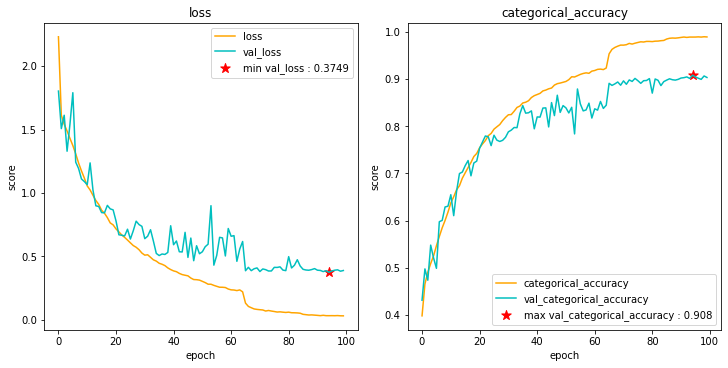

In [8]:
plot_training_hist(pd.read_csv("./attentionNeXt56-cifar10-hist.csv"))

In [11]:
model = tf.keras.models.load_model('attentionNeXt56.h5')
model.evaluate(
    test_datagen.flow(x_test_10, y_test_10, batch_size=100))

100/100 [==============================] - 34s 344ms/step - loss: 0.4740 - categorical_accuracy: 0.8891


[0.4739586412906647, 0.8891000151634216]